In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv
/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_train.csv


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from  nltk.stem import SnowballStemmer
import re
import string

In [4]:
train=pd.read_csv('../input/covid-19-nlp-text-classification/Corona_NLP_train.csv',encoding='latin-1')
test=pd.read_csv('../input/covid-19-nlp-text-classification/Corona_NLP_test.csv',encoding='latin-1')

In [5]:
train.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


<AxesSubplot:>

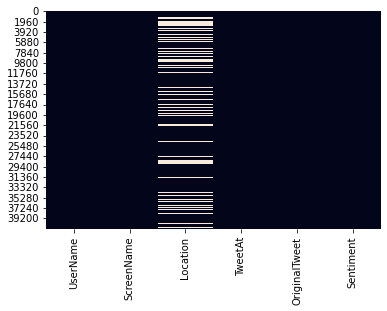

In [6]:
sns.heatmap(train.isnull(), cbar=False)

In [7]:
test.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


<AxesSubplot:>

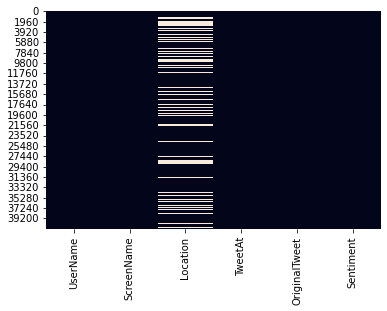

In [8]:
sns.heatmap(train.isnull(), cbar=False)

In [9]:
test.groupby('Sentiment').count()

,UserName,ScreenName,Location,TweetAt,OriginalTweet
Sentiment,,,,,
Extremely Negative,592,592,449,592,592
Extremely Positive,599,599,482,599,599
Negative,1041,1041,811,1041,1041
Neutral,619,619,497,619,619
Positive,947,947,725,947,947


In [10]:
# char_count
train['char_count'] = train['OriginalTweet'].apply(lambda x: len(str(x)))
# mention_count
train['mention_count'] = train['OriginalTweet'].apply(lambda x: len([c for c in str(x) if c == '@']))

In [11]:
# char_count
test['char_count'] = test['OriginalTweet'].apply(lambda x: len(str(x)))
# mention_count
test['mention_count'] = test['OriginalTweet'].apply(lambda x: len([c for c in str(x) if c == '@']))
test

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,char_count,mention_count
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,228,0
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,193,0
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,73,0
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,318,0
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,252,0
...,...,...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,127,0
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,213,0
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,185,2
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative,174,0


In [12]:
new = train["TweetAt"].str.split("-", n = 2, expand = True)
train['year']=new[2].astype(int)
train['month']=new[1].astype(int)
train['day']=new[0].astype(int)
train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,char_count,mention_count,year,month,day
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111,3,2020,3,16
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,237,0,2020,3,16
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,131,0,2020,3,16
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,306,0,2020,3,16
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,310,0,2020,3,16
...,...,...,...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,102,0,2020,4,14
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,138,0,2020,4,14
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,136,2,2020,4,14
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,111,0,2020,4,14


In [13]:
new = test["TweetAt"].str.split("-", n = 2, expand = True)
test['year']=new[2].astype(int)
test['month']=new[1].astype(int)
test['day']=new[0].astype(int)
test

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,char_count,mention_count,year,month,day
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,228,0,2020,3,2
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,193,0,2020,3,2
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,73,0,2020,3,2
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,318,0,2020,3,2
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,252,0,2020,3,3
...,...,...,...,...,...,...,...,...,...,...,...
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive,127,0,2020,3,16
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative,213,0,2020,3,16
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,185,2,2020,3,16
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative,174,0,2020,3,16


In [14]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
test['OriginalTweet'] = test['OriginalTweet'].apply(lambda text: cleaning_stopwords(text))
train['OriginalTweet'] = train['OriginalTweet'].apply(lambda text: cleaning_stopwords(text))


In [15]:
def cleaning_URLs(data):
    return re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',data)
train['OriginalTweet']= train['OriginalTweet'].apply(lambda x: cleaning_URLs(x))

test['OriginalTweet']= test['OriginalTweet'].apply(lambda x: cleaning_URLs(x))

In [16]:
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
train['OriginalTweet']= train['OriginalTweet'].apply(lambda x: cleaning_punctuations(x))

test['OriginalTweet']= test['OriginalTweet'].apply(lambda x: cleaning_punctuations(x))

In [17]:
def cleaning_numbers(data):
    return re.sub('[0-9]+','', data)
train['OriginalTweet']= train['OriginalTweet'].apply(lambda x: cleaning_numbers(x))

test['OriginalTweet']= test['OriginalTweet'].apply(lambda x: cleaning_numbers(x))

In [18]:
train

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,char_count,mention_count,year,month,day
0,3799,48751,London,16-03-2020,MeNyrbie PhilGahan Chrisitv,Neutral,111,3,2020,3,16
1,3800,48752,UK,16-03-2020,advice Talk neighbours family exchange phone n...,Positive,237,0,2020,3,16
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia Woolworths give elderly ...,Positive,131,0,2020,3,16
3,3802,48754,NaN,16-03-2020,My food stock one empty PLEASE panic THERE WIL...,Positive,306,0,2020,3,16
4,3803,48755,NaN,16-03-2020,Me ready go supermarket COVID outbreak Not Im ...,Extremely Negative,310,0,2020,3,16
...,...,...,...,...,...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering stock supermarket shel...,Neutral,102,0,2020,4,14
41153,44952,89904,NaN,14-04-2020,Response complaint provided citing COVID relat...,Extremely Negative,138,0,2020,4,14
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough KameronWilds rati...,Positive,136,2,2020,4,14
41155,44954,89906,NaN,14-04-2020,Is wrong smell hand sanitizer starting turn on...,Neutral,111,0,2020,4,14


In [19]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
train['OriginalTweet'] = train['OriginalTweet'].apply(tokenizer.tokenize)

test['OriginalTweet'] = test['OriginalTweet'].apply(tokenizer.tokenize)

In [20]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    data = [st.stem(word) for word in data]
    return data
train['OriginalTweet']= train['OriginalTweet'].apply(lambda x: stemming_on_text(x))

test['OriginalTweet']= test['OriginalTweet'].apply(lambda x: stemming_on_text(x))

In [21]:
train['Sentiment']=train['Sentiment'].replace('Extremely Positive','Positive')
train['Sentiment']=train['Sentiment'].replace('Extremely Negative','Negative')

test['Sentiment']=test['Sentiment'].replace('Extremely Positive','Positive')
test['Sentiment']=test['Sentiment'].replace('Extremely Negative','Negative')

In [22]:
train1=train
train1.Sentiment=train1.Sentiment.replace('Neutral',1)
train1.Sentiment=train1.Sentiment.replace('Positive',2)
train1.Sentiment=train1.Sentiment.replace('Negative',0)

In [23]:
train=train.drop(columns=['ScreenName','Location','TweetAt','year'])
test=test.drop(columns=['ScreenName','Location','TweetAt','year'])

In [24]:
Y_train=train['Sentiment']
Y_test=test['Sentiment']
X_train=train.drop("Sentiment",axis=1)
X_test=test.drop("Sentiment",axis=1)

In [25]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(41157, 6) (41157,) (3798, 6) (3798,)


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU,SimpleRNN
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence

In [27]:
X=X_train.OriginalTweet
Y=Y_train

In [28]:
max_len = 500
tok = Tokenizer(num_words=2000)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
word_index = tok.word_index
sequences_matrix

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    0,    0, ...,   41, 1039,   98],
       [   0,    0,    0, ...,  122,    1,   88],
       ...,
       [   0,    0,    0, ...,   28,   29,  301],
       [   0,    0,    0, ...,    2,    1,    2],
       [   0,    0,    0, ...,  772,    1,  255]], dtype=int32)

In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(Y)
Y=le.transform(Y)

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, Y, test_size=0.3, random_state=2)

In [31]:
# A simpleRNN without any pretrained embeddings and one dense layer
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     200,
                     input_length=max_len))
model.add(SimpleRNN(200))
model.add(Dense(3, activation='sigmoid'))
model.compile(loss =SparseCategoricalCrossentropy(), optimizer='adam', metrics=['accuracy'])
    
model.summary()

2022-12-02 07:32:36.679992: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 200)          9650200   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 200)               80200     
_________________________________________________________________
dense (Dense)                (None, 3)                 603       
Total params: 9,731,003
Trainable params: 9,731,003
Non-trainable params: 0
_________________________________________________________________


In [32]:
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
def roc_auc(predictions,target):
    '''
    This methods returns the AUC Score when given the Predictions
    and Labels
    '''
    
    fpr, tpr, thresholds = metrics.roc_curve(target, predictions)
    roc_auc = metrics.auc(fpr, tpr)
    return roc_auc

In [33]:
model.fit(X_train, Y_train, epochs=10) 

2022-12-02 07:34:16.926858: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
901/901 [==============================] - 361s 400ms/step - loss: 1.0490 - accuracy: 0.4409
Epoch 2/10
901/901 [==============================] - 367s 407ms/step - loss: 0.8822 - accuracy: 0.5911
Epoch 3/10
901/901 [==============================] - 352s 391ms/step - loss: 0.6419 - accuracy: 0.7493
Epoch 4/10
901/901 [==============================] - 355s 394ms/step - loss: 0.5067 - accuracy: 0.8196
Epoch 5/10
901/901 [==============================] - 352s 391ms/step - loss: 0.4657 - accuracy: 0.8374
Epoch 6/10
901/901 [==============================] - 348s 387ms/step - loss: 0.4345 - accuracy: 0.8484
Epoch 7/10
901/901 [==============================] - 356s 395ms/step - loss: 0.4189 - accuracy: 0.8537
Epoch 8/10
901/901 [==============================] - 350s 389ms/step - loss: 0.4613 - accuracy: 0.8345
Epoch 9/10
901/901 [==============================] - 349s 387ms/step - loss: 0.5565 - accuracy: 0.7896
Epoch 10/10
901/901 [==============================] - 345s 383m

In [34]:
model.save('model.h5')

In [35]:
Y_test

array([2, 0, 0, ..., 0, 2, 0])

In [36]:
scores = model.predict(X_test)

In [37]:
scores

array([[0.07005081, 0.13220456, 0.5592882 ],
       [0.5684702 , 0.47764105, 0.22995454],
       [0.97909117, 0.35706466, 0.7501966 ],
       ...,
       [0.20619896, 0.4148003 , 0.46593943],
       [0.20130488, 0.3569829 , 0.76109314],
       [0.4824304 , 0.24036029, 0.48879984]], dtype=float32)

In [42]:
score=[]
for s in scores:
    score+=[int(np.where(s == s.max())[0])]
score

[2,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 0,
 1,
 2,
 1,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 1,
 2,
 0,
 0,
 2,
 1,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 2,
 1,
 1,
 2,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 2,
 0,
 2,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 2,
 2,
 2,
 0,
 2,
 2,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 0,
 2,
 1,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 2,
 2,
 1,
 0,
 1,
 2,
 2,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 2,
 1,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 2,
 2,
 2,


In [43]:
from sklearn import metrics

acc=metrics.accuracy_score(score,Y_test)
acc

0.5986394557823129